In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
%matplotlib inline

In [ ]:
customers = pd.read_csv("datasets/customers.csv")
loyalty = pd.read_csv("datasets/loyalty_members.csv")
orders = pd.read_csv("datasets/orders.csv")
order_details = pd.read_csv("datasets/order_details.csv")

food_menu = pd.read_csv("datasets/food_menu.csv")
drinks_menu = pd.read_csv("datasets/drinks_menu.csv")
games_menu = pd.read_csv("datasets/games_menu.csv")

In [ ]:
# head, shape of each dataframe
dfs = {
    "customers": customers,
    "loyalty": loyalty,
    "orders": orders,
    "order_details": order_details,
    "food_menu": food_menu,
    "drinks_menu": drinks_menu,
    "games_menu": games_menu,
}

for name, df in dfs.items():
    print(f"\n===== {name.upper()} =====")
    print(df.head(3))
    print(df.shape)


===== CUSTOMERS =====
              name                       email           phone  \
0  Mason MacDonald  mason.macdonald0@gmail.com  1-365-227-6804   
1      Noah Wilson      noah.wilson1@yahoo.com  1-647-501-6525   
2       Nora Smith       nora.smith2@yahoo.com  1-365-422-7133   

  loyalty_enrolled  
0                N  
1                Y  
2                N  
(500, 4)

===== LOYALTY =====
  loyalty_id                       email      tier  points_earned  gender  \
0    L000002      noah.wilson1@yahoo.com  Frequent           6415    Male   
1    L000005  layla.gonzalez4@icloud.com  Frequent           5245  Female   
2    L000009       mila.nowak8@yahoo.com  Frequent           7047    Male   

   age    birthday         occupation            name  
0   28  1997-03-18        Electrician     Noah Wilson  
1   33  1992-02-18  Software Engineer  Layla Gonzalez  
2   25  2000-08-13   Graphic Designer      Mila Nowak  
(308, 9)

===== ORDERS =====
  transaction_id                    

# Merge all menu -> menu_all

In [ ]:
food_menu["item_type"] = "food"
drinks_menu["item_type"] = "drink"
games_menu["item_type"] = "entertainment"

menu_all = pd.concat([food_menu, drinks_menu, games_menu], ignore_index=True)

menu_all

,id,name,category,unit_price_cad,item_type
0,F001,Classic Burger,Mains,17.99,food
1,F002,Chicken Wings,Appetizers,15.49,food
2,F003,Nachos Supreme,Appetizers,16.99,food
3,F004,Mac & Cheese,Mains,14.49,food
4,F005,BBQ Ribs Half Rack,Mains,23.99,food
5,F006,Caesar Salad,Salads,12.49,food
6,F007,Veggie Pizza,Mains,18.99,food
7,F008,Steak Sandwich,Mains,21.49,food
8,F009,Fish Tacos,Mains,16.49,food
9,F010,Chocolate Lava Cake,Desserts,8.99,food


In [ ]:
# export combined menu to csv
menu_all.to_csv("datasets/combined_menu.csv", index=False)


In [ ]:
# Add columns to customers: visit_count, total_spent
visit_count_df = orders.groupby("email")["transaction_id"].nunique().reset_index(name="visit_count")
total_spent_df = orders.groupby("email")["total_bill_amount"].sum().reset_index(name="total_spent")
customers = customers.merge(visit_count_df, on="email", how="left") \
                     .merge(total_spent_df, on="email", how="left")

#drop phone number and name
customers = customers.drop(columns=["phone","name"])


customers.head(10)


,email,loyalty_enrolled,visit_count,total_spent
0,mason.macdonald0@gmail.com,N,7,763.26
1,noah.wilson1@yahoo.com,Y,6,641.59
2,nora.smith2@yahoo.com,N,11,1386.86
3,jackson.liu3@outlook.com,N,7,441.27
4,layla.gonzalez4@icloud.com,Y,5,524.54
5,harper.nowak5@outlook.com,N,7,292.39
6,carter.patel6@yahoo.com,N,8,718.99
7,isabella.tremblay7@outlook.com,N,7,551.16
8,mila.nowak8@yahoo.com,Y,8,704.71
9,alexander.lau9@hotmail.com,Y,12,876.98


In [ ]:
# average visit count of loyalty_enrolled==N customers
avg_visit_count_non_loyalty = customers[customers['loyalty_enrolled'] == 'N']['total_spent'].mean()
print(f"Average visit count of loyalty_enrolled==N customers: {avg_visit_count_non_loyalty}")   
avg_visit_count_non_loyalty = customers[customers['loyalty_enrolled'] == 'Y']['total_spent'].mean()
print(f"Average visit count of loyalty_enrolled==Y customers: {avg_visit_count_non_loyalty}")   

Average visit count of loyalty_enrolled==N customers: 752.9224999999998
Average visit count of loyalty_enrolled==Y customers: 772.2098376623377


In [ ]:
# last 5 rows of orders
orders.tail(5)

,transaction_id,email,transaction_date,time_spent_min,total_bill_amount
4495,T004496,emma.su325@yahoo.com,2025-10-28,100,34.76
4496,T004497,chloe.wilson133@hotmail.com,2025-10-28,114,56.26
4497,T004498,evelyn.white385@outlook.com,2025-10-28,140,143.70
4498,T004499,oliver.wang362@gmail.com,2025-10-28,80,95.75
4499,T004500,logan.kowalski231@outlook.com,2025-10-28,115,13.28


         date  total_sales
0  2024-10-28      1032.49
1  2024-10-29       804.85
2  2024-10-30      1171.77
3  2024-10-31       708.00
4  2024-11-01       674.29


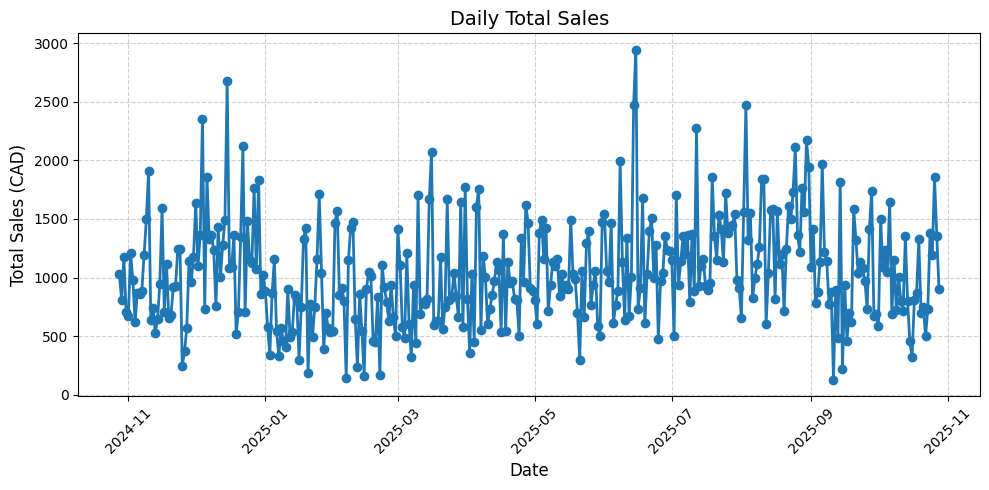

In [ ]:
orders['transaction_date'] = pd.to_datetime(orders['transaction_date'])
daily_sales = orders.groupby(orders['transaction_date'].dt.date)['total_bill_amount'].sum().reset_index()

daily_sales.columns = ['date', 'total_sales']
print(daily_sales.head())
plt.figure(figsize=(10,5))
plt.plot(daily_sales['date'], daily_sales['total_sales'], marker='o', linewidth=2)

plt.title('Daily Total Sales', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales (CAD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

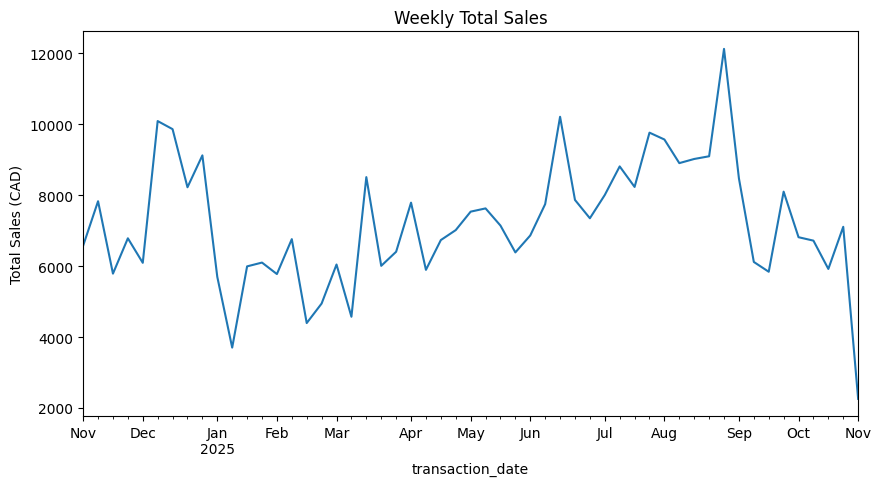

In [ ]:
weekly_sales = orders.groupby(orders['transaction_date'].dt.to_period('W'))['total_bill_amount'].sum()
weekly_sales.plot(kind='line', figsize=(10,5), title='Weekly Total Sales')
plt.ylabel('Total Sales (CAD)')
plt.show()

# EDA 

## 1. Customer Persona + Loyalty

In [ ]:
loyalty.head()

,loyalty_id,email,tier,points_earned,gender,age,birthday,occupation,name
0,L000002,noah.wilson1@yahoo.com,Frequent,6415,Male,28,1997-03-18,Electrician,Noah Wilson
1,L000005,layla.gonzalez4@icloud.com,Frequent,5245,Female,33,1992-02-18,Software Engineer,Layla Gonzalez
2,L000009,mila.nowak8@yahoo.com,Frequent,7047,Male,25,2000-08-13,Graphic Designer,Mila Nowak
3,L000010,alexander.lau9@hotmail.com,Very Frequent,8769,Male,31,1994-07-16,Project Manager,Alexander Lau
4,L000011,aria.nowak10@icloud.com,Frequent,5417,Female,27,1998-08-26,Barista,Aria Nowak


In [ ]:
loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   loyalty_id     308 non-null    object
 1   email          308 non-null    object
 2   tier           308 non-null    object
 3   points_earned  308 non-null    int64 
 4   gender         308 non-null    object
 5   age            308 non-null    int64 
 6   birthday       308 non-null    object
 7   occupation     308 non-null    object
 8   name           308 non-null    object
dtypes: int64(2), object(7)
memory usage: 21.8+ KB


In [ ]:
loyalty.describe()

,points_earned,age
count,308.000000,308.000000
mean,7721.636364,31.649351
std,2884.672732,8.994774
min,1391.000000,18.000000
25%,5486.500000,25.000000
50%,7387.500000,31.000000
75%,9679.250000,38.000000
max,15505.000000,58.000000


In [ ]:
loyalty.isna().sum()

loyalty_id       0
email            0
tier             0
points_earned    0
gender           0
age              0
birthday         0
occupation       0
name             0
dtype: int64

In [ ]:
# check if there are duplicate emails in loyalty
loyalty['email'].duplicated().sum()

np.int64(0)

tier
Frequent         179
Very Frequent    126
Casual             3
Name: count, dtype: int64


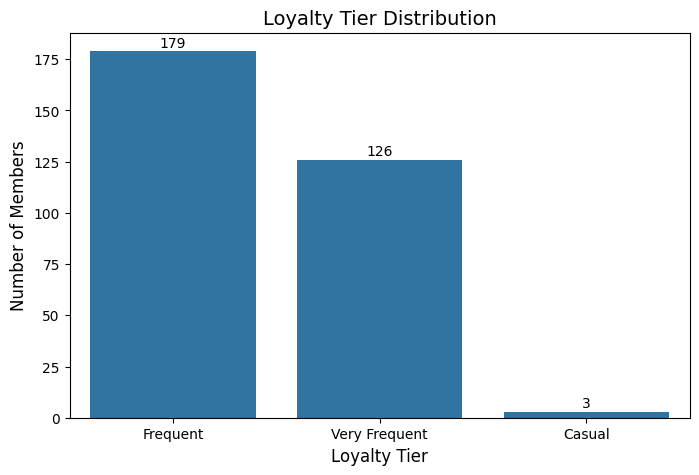

In [ ]:
print(loyalty['tier'].value_counts())
# histogram of loyalty tiers
plt.figure(figsize=(8,5))
sns.countplot(data=loyalty, x='tier', order=loyalty['tier'].value_counts().index)
for i in range(len(loyalty['tier'].value_counts())):
    plt.text(i, loyalty['tier'].value_counts().values[i]+2, loyalty['tier'].value_counts().values[i], ha='center', fontsize=10)

plt.title('Loyalty Tier Distribution', fontsize=14)
plt.xlabel('Loyalty Tier', fontsize=12)
plt.ylabel('Number of Members', fontsize=12)
plt.show()



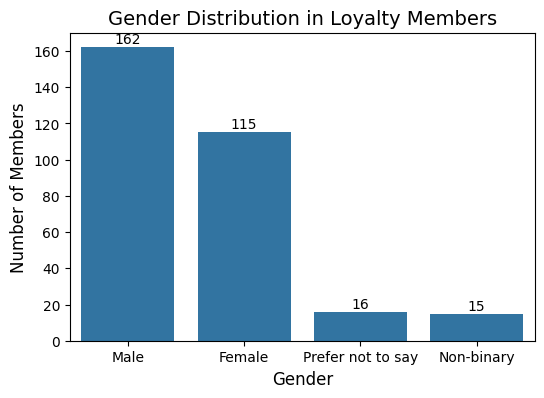

In [ ]:
# barplot of gender distribution in loyalty
loyalty['gender'].value_counts()
plt.figure(figsize=(6,4))
sns.countplot(data=loyalty, x='gender', order=loyalty['gender'].value_counts().index)    
for i in range(len(loyalty['gender'].value_counts())):
    plt.text(i, loyalty['gender'].value_counts().values[i]+2, loyalty['gender'].value_counts().values[i], ha='center', fontsize=10)   
plt.title('Gender Distribution in Loyalty Members', fontsize=14)
plt.xlabel('Gender', fontsize=12)               
plt.ylabel('Number of Members', fontsize=12)
plt.show()

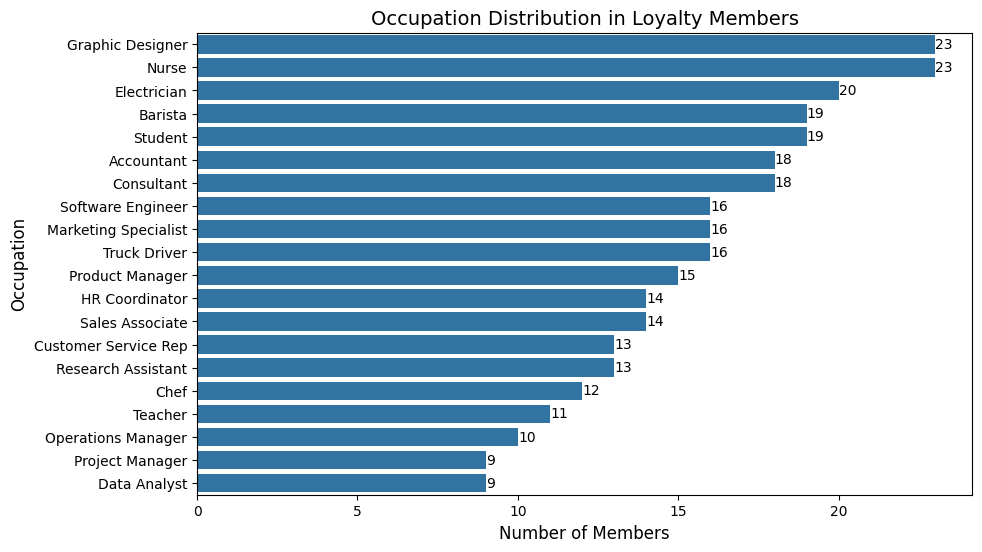

In [ ]:
# occupation distribution in loyalty
plt.figure(figsize=(10,6))  
sns.countplot(data=loyalty, y='occupation', order=loyalty['occupation'].value_counts().index)
# add number of members labels to each bar
for i in range(len(loyalty['occupation'].value_counts())):
    plt.text(loyalty['occupation'].value_counts().values[i], i, loyalty['occupation'].value_counts().values[i], va='center', fontsize=10)
plt.title('Occupation Distribution in Loyalty Members', fontsize=14)    
plt.xlabel('Number of Members', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.show()



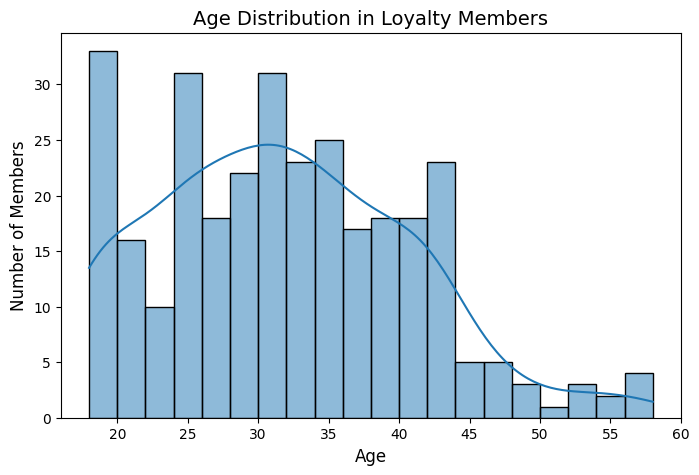

In [ ]:
# age distribution in loyalty
plt.figure(figsize=(8,5))   
sns.histplot(data=loyalty, x='age', bins=20, kde=True)
plt.title('Age Distribution in Loyalty Members', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Members', fontsize=12)
plt.show()

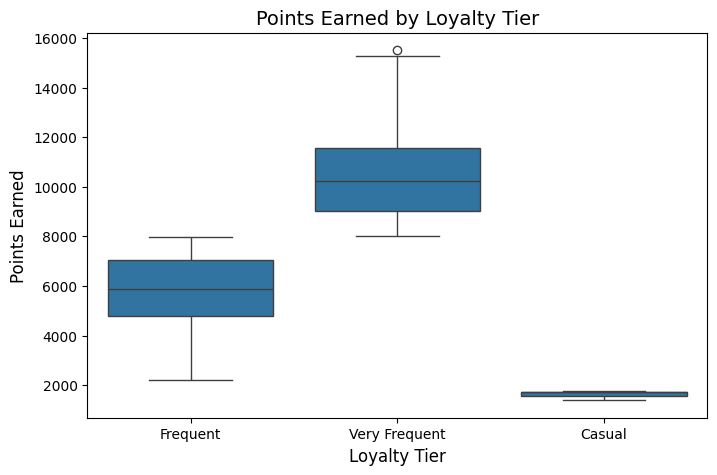

In [ ]:
#boxplot of points_earned by loyalty tier
plt.figure(figsize=(8,5))
sns.boxplot(data=loyalty, x='tier', y='points_earned', order=loyalty['tier'].value_counts().index)
plt.title('Points Earned by Loyalty Tier', fontsize=14)
plt.xlabel('Loyalty Tier', fontsize=12)
plt.ylabel('Points Earned', fontsize=12)
plt.show()

In [ ]:
loyalty.groupby('tier').agg({'points_earned':'mean', "age":'mean', 'loyalty_id': 'count'})

,points_earned,age,loyalty_id
tier,,,
Casual,1619.666667,26.000000,3
Frequent,5830.731844,31.502793,179
Very Frequent,10553.206349,31.992063,126


In [ ]:
loyalty_members = loyalty.drop(columns=['loyalty_id', 'tier', 'birthday', 'name'])
loyalty_members.head()

,email,points_earned,gender,age,occupation
0,noah.wilson1@yahoo.com,6415,Male,28,Electrician
1,layla.gonzalez4@icloud.com,5245,Female,33,Software Engineer
2,mila.nowak8@yahoo.com,7047,Male,25,Graphic Designer
3,alexander.lau9@hotmail.com,8769,Male,31,Project Manager
4,aria.nowak10@icloud.com,5417,Female,27,Barista


In [ ]:
points_avg_by_occupation = loyalty_members.groupby('occupation')['points_earned'].mean()
sorted_avg_points_by_occupation = points_avg_by_occupation.sort_values(ascending=False)
print(sorted_avg_points_by_occupation)

occupation
Research Assistant      9280.000000
Graphic Designer        9056.521739
Project Manager         8999.777778
HR Coordinator          8861.928571
Chef                    8775.750000
Electrician             8608.500000
Software Engineer       8322.937500
Marketing Specialist    7942.437500
Customer Service Rep    7750.230769
Operations Manager      7651.400000
Accountant              7356.333333
Teacher                 7348.636364
Truck Driver            7275.187500
Consultant              7243.833333
Product Manager         7223.533333
Student                 6900.000000
Nurse                   6888.086957
Sales Associate         6782.285714
Data Analyst            6596.333333
Barista                 6159.368421
Name: points_earned, dtype: float64


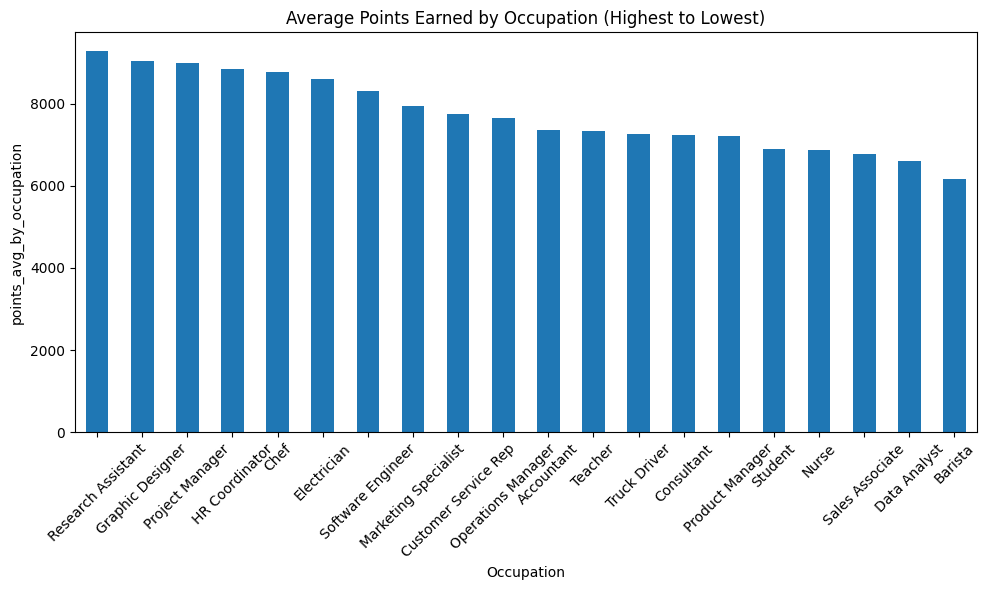

In [ ]:
plt.figure(figsize=(10,6))
sorted_avg_points_by_occupation.plot(kind='bar')

plt.xlabel('Occupation')
plt.ylabel('points_avg_by_occupation')
plt.title('Average Points Earned by Occupation (Highest to Lowest)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
points_avg_by_gender = loyalty_members.groupby('gender')['points_earned'].mean()

sorted_avg_points_by_gender = points_avg_by_gender.sort_values(ascending=False)

print(sorted_avg_points_by_gender)

gender
Prefer not to say    8661.375000
Non-binary           7961.333333
Female               7751.217391
Male                 7585.629630
Name: points_earned, dtype: float64


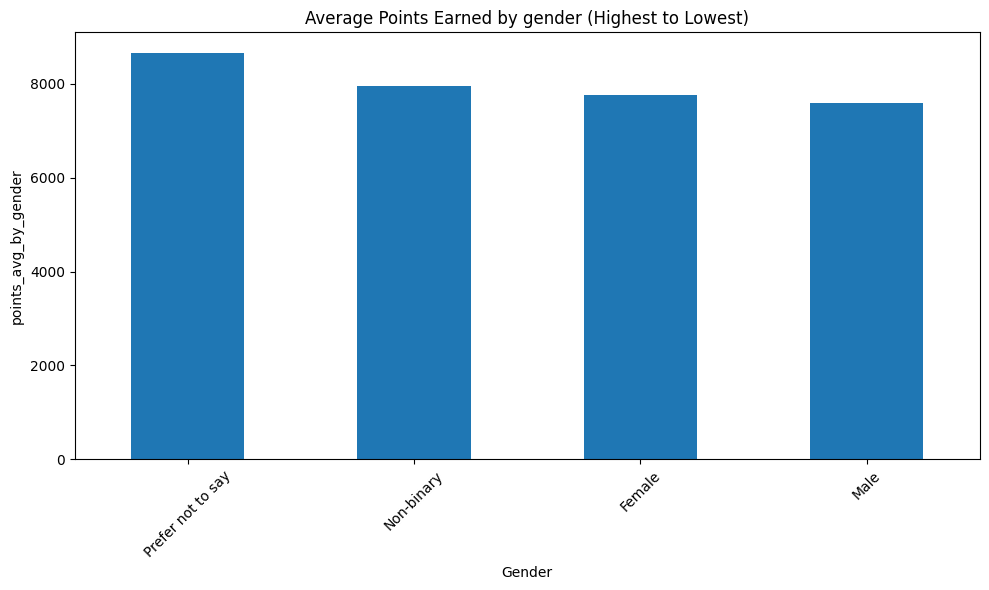

In [ ]:
plt.figure(figsize=(10,6))
sorted_avg_points_by_gender.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('points_avg_by_gender')
plt.title('Average Points Earned by gender (Highest to Lowest)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
order_details['category'].unique()


array(['Mains', 'Appetizers', 'Non-alcoholic', 'Cocktail', 'Air Hockey',
       'Arcade', 'Alcoholic', 'Salads', 'Bowling', 'VR', 'Billiards',
       'Desserts'], dtype=object)

In [ ]:
games_menu['category'].unique()

array(['Arcade', 'VR', 'Billiards', 'Bowling'], dtype=object)

In [ ]:
import pandas as pd

# 读取原始数据
order_details = pd.read_csv("datasets/order_details.csv")

# 检查原有类别
print("🔍 原始 category 种类：", order_details['category'].unique())

# 将 category = 'Air Hockey' 的行修改为 'Arcade'
order_details.loc[order_details['category'] == 'Air Hockey', 'category'] = 'Arcade'



# 再次检查结果
print("✅ 修正后 category 种类：", order_details['category'].unique())

# 导出新文件
order_details.to_csv("datasets/order_details_fixed.csv", index=False)
print("📁 已成功导出为 datasets/order_details_fixed.csv")


🔍 原始 category 种类： ['Mains' 'Appetizers' 'Non-alcoholic' 'Cocktail' 'Air Hockey' 'Arcade'
 'Alcoholic' 'Salads' 'Bowling' 'VR' 'Billiards' 'Desserts']
✅ 修正后 category 种类： ['Mains' 'Appetizers' 'Non-alcoholic' 'Cocktail' 'Arcade' 'Alcoholic'
 'Salads' 'Bowling' 'VR' 'Billiards' 'Desserts']
📁 已成功导出为 datasets/order_details_fixed.csv


In [ ]:
import pandas as pd

# 1) 用修正后的明细表
order_details = pd.read_csv("datasets/order_details_fixed.csv")

# 2) （可选）做一次 sanity check，确认没有“Air Hockey”等脏类别
bad = set(order_details['category'].unique()) - {
    'Appetizers','Mains','Desserts','Salads',
    'Alcoholic','Non-alcoholic','Cocktail',
    'Arcade','VR','Bowling','Billiards'
}
assert not bad, f"发现未修正类别: {bad}"

# 3) 顾客×类别 购买次数（频次特征）
cust_category_count = order_details.groupby(["email","category"]).size().unstack(fill_value=0)

# 4) 读取订单，合并总消费&访问次数
orders = pd.read_csv("datasets/orders.csv")
total_spent = orders.groupby("email")["total_bill_amount"].sum().reset_index(name="total_spent_year")
visit_count  = orders.groupby("email")["transaction_id"].nunique().reset_index(name="visit_count_year")

combined_customer = (cust_category_count
                     .merge(total_spent, on="email", how="left")
                     .merge(visit_count, on="email", how="left")
                     .fillna(0))



# 假设 loyalty_member.csv 里有 email
loyalty = pd.read_csv("datasets/loyalty_members.csv")

# 创建 loyalty 二元列
loyalty["is_loyalty"] = 1  # 所有 loyalty_member 都标记为 1

# 先合并
combined_customer = combined_customer.merge(loyalty[["email", "is_loyalty"]], on="email", how="left")

# 非会员填 0
combined_customer["is_loyalty"] = combined_customer["is_loyalty"].fillna(0)


combined_customer.to_csv("combined_customer.csv", index=False)




✅ combined_customer.csv created successfully.


In [ ]:
from sklearn.preprocessing import StandardScaler

X = combined_customer.drop(columns=["email"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
combined_customer_scaled = pd.concat([combined_customer["email"], X_scaled_df], axis=1)
combined_customer_scaled.to_csv("combined_customers_standardized.csv", index=False)